<a href="https://colab.research.google.com/github/farhanadhilah/Exploratory-Data-Analysis/blob/main/Travel%20Insurance%20Prediction%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source



1.   https://www.kaggle.com/code/krishnabhatt4/travel-insurance-predictions/notebook (code kaggle)
2.   https://www.analyticsvidhya.com/blog/2020/04/statistics-data-science-normal-distribution/ (plot distribusi)
3. https://jha-vineet69.github.io/Credit-Risk-Analyzer/ (visualisasi data & model DT)
4. https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/ (confusion matrix & classification report)
5. https://tdgunes.com/COMP6246-2018Fall/lab3_solution/index.html (gini & entropy)
6. https://www.analyticsvidhya.com/blog/2021/06/classification-problem-relation-between-sensitivity-specificity-and-accuracy/ (sensitivity, specificity, accuracy)



# Import Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Loading Data

In [ ]:
from google.colab import files
upload = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction.csv


In [ ]:
data = pd.read_csv('TravelInsurancePrediction.csv')
data.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Checking Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

baris =  1987 , Kolom =  10


In [ ]:
obj_data = data.select_dtypes(include=['object']).copy()
print(obj_data.nunique())

Employment Type        2
GraduateOrNot          2
FrequentFlyer          2
EverTravelledAbroad    2
dtype: int64


In [ ]:
print('Employment Type:', data['Employment Type'].unique())
print('Graduate or Not:', data['GraduateOrNot'].unique())
print('Fraquent Flyer:', data['FrequentFlyer'].unique())
print('Ever Travel Abroad:', data['EverTravelledAbroad'].unique())

Employment Type: ['Government Sector' 'Private Sector/Self Employed']
Graduate or Not: ['Yes' 'No']
Fraquent Flyer: ['No' 'Yes']
Ever Travel Abroad: ['No' 'Yes']


In [ ]:
type(data)

pandas.core.frame.DataFrame

##Cek Missing Value

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

In [ ]:
print(data.isnull().any())

Unnamed: 0             False
Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool


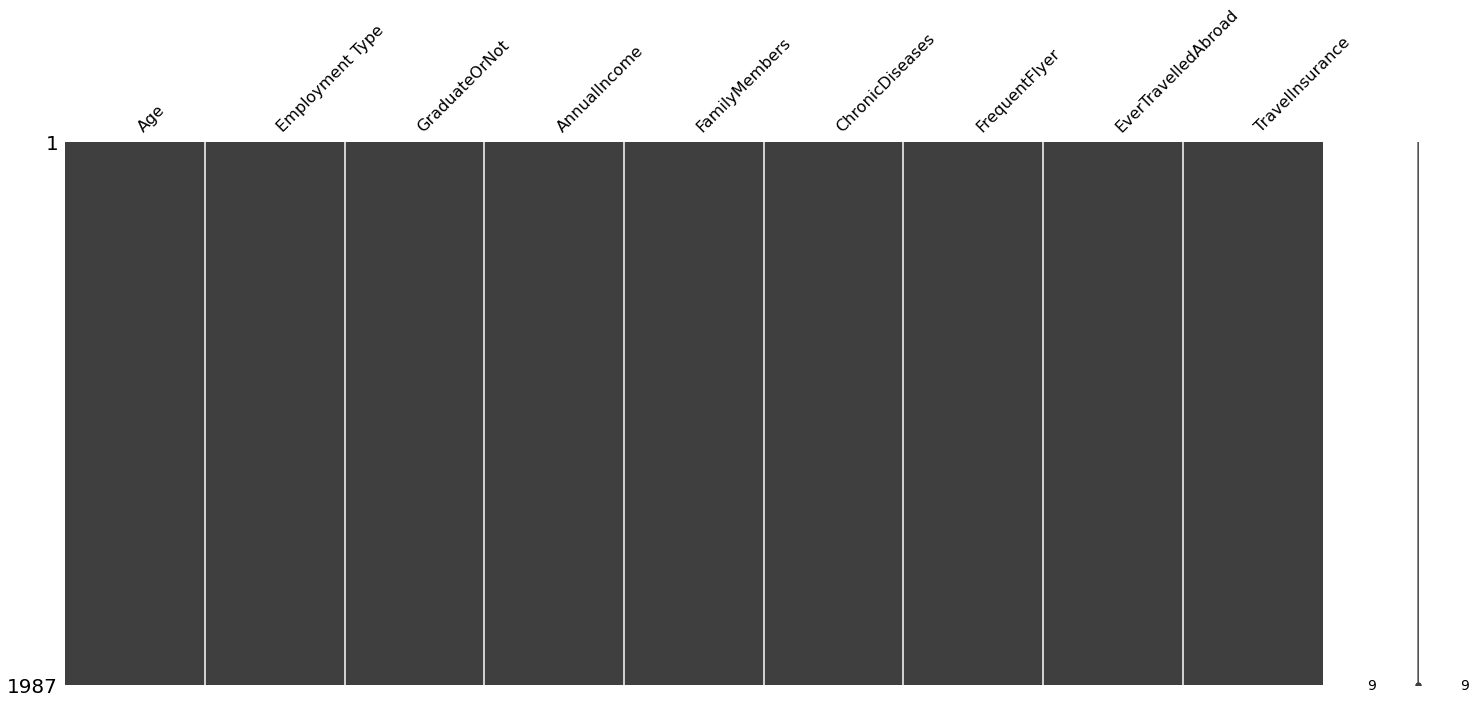

In [ ]:
msno.matrix(data[['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance']])

# Visualisasi Data

In [ ]:
def plot_bar_graph(column_name):
    ed_count = column_name.value_counts()
    sns.set(style="darkgrid")
    sns.barplot(ed_count.index, ed_count.values, alpha=0.9)
    plt.title('Frequency Distribution of {} Levels using Bar Plot'.format(column_name.name))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('{}'.format(column_name.name), fontsize=12)
    plt.show()

def plot_pie_graph(column_name):
    labels = column_name.astype('category').cat.categories.tolist()
    counts = column_name.value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title('Frequency Distribution of {} Levels using Pie Chart'.format(column_name.name))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


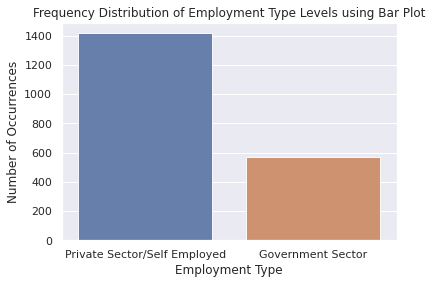

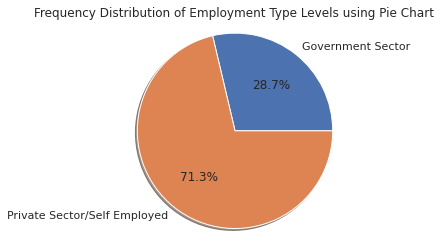

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


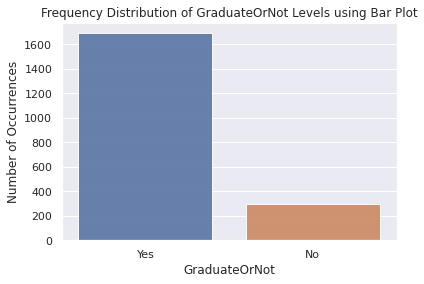

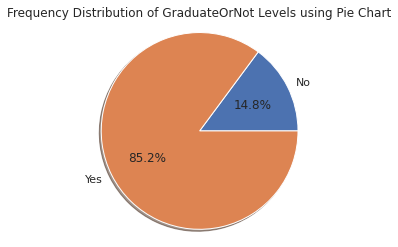

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


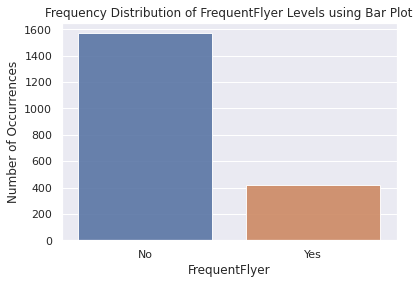

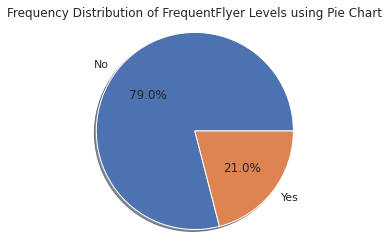

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


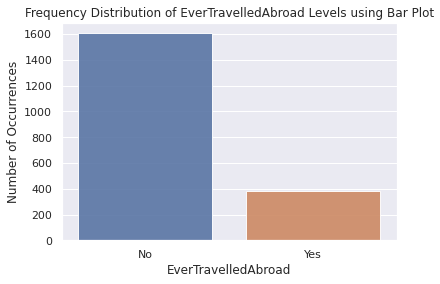

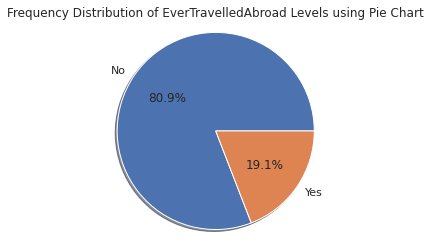

In [ ]:
for col in obj_data.columns:
    plot_bar_graph(obj_data[col])
    plot_pie_graph(obj_data[col])

In [ ]:
data['Age'].value_counts()

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

In [ ]:
print(data['Employment Type'].value_counts())
print('-----------------------------------------')
print(data['GraduateOrNot'].value_counts())
print('-----------------------------------------')
print(data['FrequentFlyer'].value_counts())
print('-----------------------------------------')
print(data['EverTravelledAbroad'].value_counts())

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64
-----------------------------------------
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
-----------------------------------------
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64
-----------------------------------------
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


In [ ]:
table1 = pd.pivot_table(data, values=['AnnualIncome'], index=['Employment Type', 'EverTravelledAbroad','FrequentFlyer'],
                    aggfunc={'AnnualIncome': [min, max, np.mean]})
table1

AnnualIncome  \
                                                                        max   
Employment Type              EverTravelledAbroad FrequentFlyer                
Government Sector            No                  No               1750000.0   
                                                 Yes              1300000.0   
                             Yes                 No               1300000.0   
                                                 Yes              1500000.0   
Private Sector/Self Employed No                  No               1750000.0   
                                                 Yes              1800000.0   
                             Yes                 No               1750000.0   
                                                 Yes              1700000.0   

                                                                              \
                                                                        mean   
Employment Type              EverTravelledAbroad FrequentFlyer                 
Government Sector            No                  No             6.777197e+05   
                                                 Yes            8.840426e+05   
                             Yes                 No             8.540000e+05   
                                                 Yes            1.330000e+06   
Private Sector/Self Employed No                  No             8.765909e+05   
                                                 Yes            1.083911e+06   
                             Yes                 No             1.283957e+06   
                                                 Yes            1.415541e+06   

                                                                          
                                                                     min  
Employment Type              EverTravelledAbroad FrequentFlyer            
Government Sector            No                  No             300000.0  
                                                 Yes            600000.0  
                             Yes                 No             350000.0  
                                                 Yes            800000.0  
Private Sector/Self Employed No                  No             350000.0  
                                                 Yes            550000.0  
                             Yes                 No             550000.0  
                                                 Yes            500000.0

In [ ]:
table2 = pd.pivot_table(data, values=['FamilyMembers'], index=['Employment Type', 'EverTravelledAbroad','FrequentFlyer','GraduateOrNot'],
                    aggfunc={'FamilyMembers': [min,max]})
table2

FamilyMembers  \
                                                                                       max   
Employment Type              EverTravelledAbroad FrequentFlyer GraduateOrNot                 
Government Sector            No                  No            No                        9   
                                                               Yes                       9   
                                                 Yes           Yes                       9   
                             Yes                 No            Yes                       9   
                                                 Yes           Yes                       7   
Private Sector/Self Employed No                  No            No                        9   
                                                               Yes                       9   
                                                 Yes           No                        8   
                                                               Yes                       9   
                             Yes                 No            No                        7   
                                                               Yes                       9   
                                                 Yes           No                        9   
                                                               Yes                       9   

                                                                                  
                                                                             min  
Employment Type              EverTravelledAbroad FrequentFlyer GraduateOrNot      
Government Sector            No                  No            No              2  
                                                               Yes             2  
                                                 Yes           Yes             2  
                             Yes                 No            Yes             2  
                                                 Yes           Yes             2  
Private Sector/Self Employed No                  No            No              2  
                                                               Yes             2  
                                                 Yes           No              3  
                                                               Yes             2  
                             Yes                 No            No              2  
                                                               Yes             2  
                                                 Yes           No              2  
                                                               Yes             2

In [ ]:
table3 = pd.pivot_table(data, values=['AnnualIncome'], index=['Employment Type','GraduateOrNot'],
                    aggfunc={'AnnualIncome': [min,max]})
table3

AnnualIncome        
                                                    max     min
Employment Type              GraduateOrNot                     
Government Sector            No                 1750000  300000
                             Yes                1750000  300000
Private Sector/Self Employed No                 1700000  350000
                             Yes                1800000  350000

# Statistika Deskriptif

In [ ]:
data2=data.copy()
for col in ['Employment Type','GraduateOrNot','ChronicDiseases', 'FrequentFlyer','EverTravelledAbroad','TravelInsurance']:
    data2[col] = data2[col].astype('category')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           1987 non-null   int64   
 1   Age                  1987 non-null   int64   
 2   Employment Type      1987 non-null   category
 3   GraduateOrNot        1987 non-null   category
 4   AnnualIncome         1987 non-null   int64   
 5   FamilyMembers        1987 non-null   int64   
 6   ChronicDiseases      1987 non-null   category
 7   FrequentFlyer        1987 non-null   category
 8   EverTravelledAbroad  1987 non-null   category
 9   TravelInsurance      1987 non-null   category
dtypes: category(6), int64(4)
memory usage: 74.6 KB


In [ ]:
#data2.drop('Unnamed: 0', axis=1).describe().transpose()
data2.drop('Unnamed: 0', axis=1).describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [ ]:
data2[['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','ChronicDiseases','TravelInsurance']].describe(include='all').transpose()

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607
ChronicDiseases,1987,2,0,1435
TravelInsurance,1987,2,0,1277


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


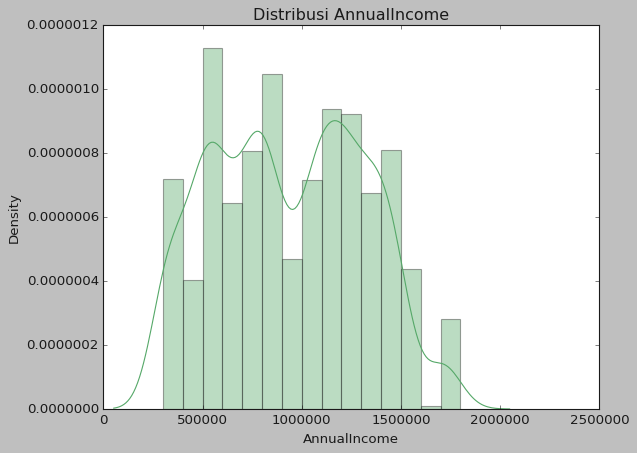

In [ ]:
# mean = data["AnnualIncome"].mean()
# median = data["AnnualIncome"].median()
# st_dev = data["AnnualIncome"].std()
# skew = data["AnnualIncome"].skew()
# kurt = data["AnnualIncome"].kurtosis()
# points = mean-st_dev, mean+st_dev

plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data["AnnualIncome"], color="g")
plt.title("Distribusi AnnualIncome")# \nstd_dev = {}; kurtosis = {};\nskew = {};\nmean = {}; median = {}".format((round(points[0],2),
                                                                                                               #round(points[1],2)),
                                                                                                               #round(kurt,2),round(skew,2),
                                                                                                               #round(mean,2),round(median,2)))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


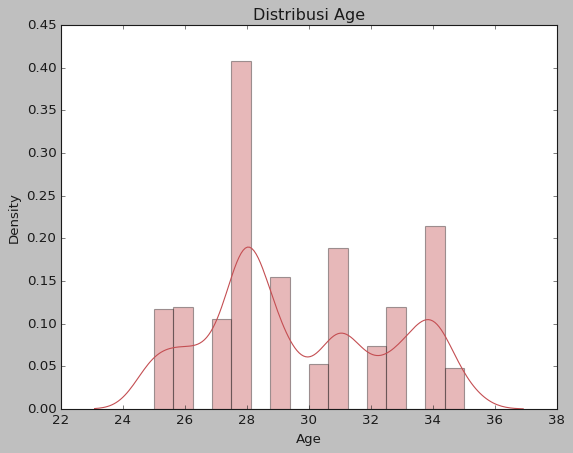

In [ ]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data["Age"], color="r")
plt.title("Distribusi Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


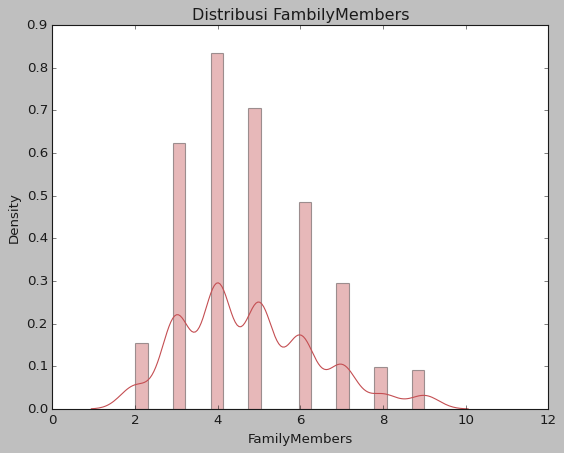

In [ ]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data["FamilyMembers"], color="r")
plt.title("Distribusi FambilyMembers")
plt.show()

# Data Preprocessing

## Converting Categorical Data to Numerical Data

In [ ]:
data2.rename(columns={'Employment Type': 'EmploymentType'}, inplace=True) #hapus spasi (rename)
data2.drop("Unnamed: 0", axis=1, inplace=True) #hapus kolom observasi (unnamed)

#change chategoric to numeric
# Yes : 1 , No : 0
data2['GraduateOrNot'] = data2['GraduateOrNot'].map({'Yes': 1, 'No': 0})
data2['FrequentFlyer'] = data2['FrequentFlyer'].map({'Yes': 1, 'No': 0})
data2['EverTravelledAbroad'] = data2['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

# Government Sector : 1, Private Sector/Self Employed : 0
data2["EmploymentType"] = data2["EmploymentType"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})


data2.sample(5)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1087,31,1,1,1200000,7,1,0,0,0
405,32,1,1,850000,6,0,0,0,0
810,29,0,1,600000,4,1,0,0,0
1251,28,0,1,500000,5,1,0,0,1
359,25,0,0,1150000,3,0,0,0,0


In [ ]:
num=data2.pivot_table(index=['TravelInsurance'])
print(num)

DF1=pd.crosstab(index=data2['TravelInsurance'],columns=data['GraduateOrNot'])
DF1.rename(columns={'No':'Not Graduated', 'Yes':'Graduated'}, inplace=True)
DF2=pd.crosstab(index=data2['TravelInsurance'],columns=data['ChronicDiseases'])
DF2.rename(columns={0:'No CD', 1:'CD'}, inplace=True)
DF3=pd.crosstab(index=data2['TravelInsurance'],columns=data['FrequentFlyer'])
DF3.rename(columns={'No':'Not FF', 'Yes':'FF'}, inplace=True)
DF4=pd.crosstab(index=data2['TravelInsurance'],columns=data['Employment Type'])
DF5=pd.crosstab(index=data2['TravelInsurance'],columns=data['EverTravelledAbroad'])
DF5.rename(columns={'No':'Never TA', 'Yes':'Ever TA'}, inplace=True)

                       Age  AnnualIncome  FamilyMembers
TravelInsurance                                        
0                29.517619  8.212999e+05       4.657009
1                29.888732  1.133239e+06       4.925352


In [ ]:
pd.concat([num,DF1,DF2,DF3,DF4,DF5],axis=1)

,Age,AnnualIncome,FamilyMembers,Not Graduated,Graduated,No CD,CD,Not FF,FF,Government Sector,Private Sector/Self Employed,Never TA,Ever TA
TravelInsurance,,,,,,,,,,,,,
0,29.517619,8.212999e+05,4.657009,196,1081,930,347,1099,178,430,847,1195,82
1,29.888732,1.133239e+06,4.925352,99,611,505,205,471,239,140,570,412,298


## Checking Data Correlation

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   EmploymentType       1987 non-null   category
 2   GraduateOrNot        1987 non-null   category
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   int64   
 5   ChronicDiseases      1987 non-null   category
 6   FrequentFlyer        1987 non-null   category
 7   EverTravelledAbroad  1987 non-null   category
 8   TravelInsurance      1987 non-null   category
dtypes: category(6), int64(3)
memory usage: 59.1 KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
dfhm = data2.copy()
for col in ['Age','EmploymentType','GraduateOrNot', 'AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance']:
    dfhm[col] = dfhm[col].astype('int64')
dfhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   EmploymentType       1987 non-null   int64
 2   GraduateOrNot        1987 non-null   int64
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int64
 7   EverTravelledAbroad  1987 non-null   int64
 8   TravelInsurance      1987 non-null   int64
dtypes: int64(9)
memory usage: 139.8 KB


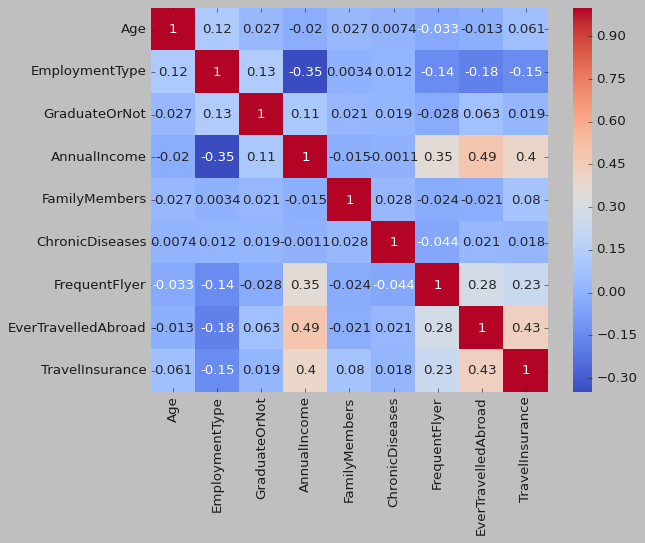

In [ ]:
#pake data yg tipenya integer semua
plt.figure(figsize=(8,6))
sns.heatmap(dfhm.corr(),annot=True,cmap="coolwarm")
plt.show()

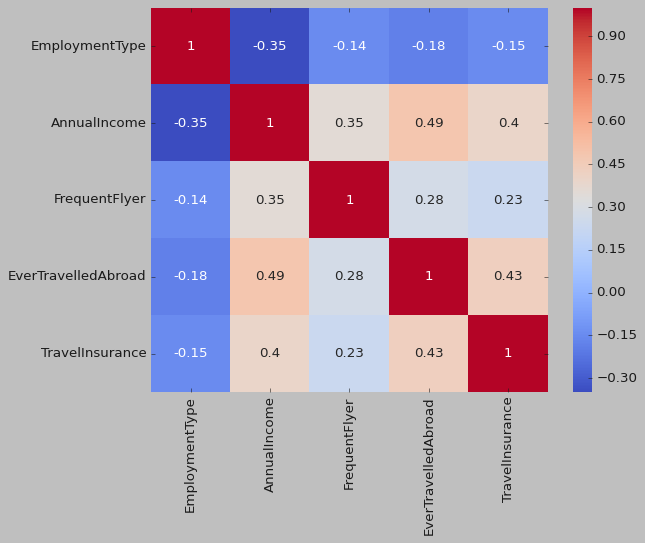

In [ ]:
data_drop=dfhm.drop(['Age','GraduateOrNot','FamilyMembers','ChronicDiseases'], axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(data_drop.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
X = data_drop.drop("TravelInsurance", axis=1)
X.head(5)

,EmploymentType,AnnualIncome,FrequentFlyer,EverTravelledAbroad
0,1,400000,0,0
1,0,1250000,0,0
2,0,500000,0,0
3,0,700000,0,0
4,0,700000,1,0


In [ ]:
X.shape

(1987, 4)

In [ ]:
y = data_drop['TravelInsurance']
y.head(5)

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

(1589, 4) 1589
(398, 4) 398


In [ ]:
y_train.describe()

count    1589.000000
mean        0.358087
std         0.479589
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TravelInsurance, dtype: float64

In [ ]:
!pip install pingouin

In [ ]:
#setelah drop data yg gak dipake (dari heatmap)
#import pingouin as pg
from pingouin import multivariate_normality
#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(data_drop, alpha=.05)

ImportError: ignored

# Model Building

## 1. Decision Tree with Entropy

In [ ]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=0, min_samples_leaf=10, min_samples_split=10)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=0)

In [ ]:
y_pred_entropy=dtree.predict(X_test)

In [ ]:
Score_entropy=accuracy_score(y_test,y_pred_entropy)
#print("Accuracy:", round(Score_entropy*100,2))
print('Accuracy:', Score_entropy*100)

Accuracy: 80.15075376884423


In [ ]:
print(metrics.confusion_matrix(y_test,y_pred_entropy,labels = [1,0]))
print('-----------------------------------------')
tp, fn, fp, tn = confusion_matrix(y_test,y_pred_entropy,labels=[1,0]).ravel()
print('TP:', tp)
print('FN:', fn)
print('FP:', fp)
print('TN:', tn)

[[ 63  78]
 [  1 256]]
-----------------------------------------
TP: 63
FN: 78
FP: 1
TN: 256


In [ ]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       257
           1       0.98      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.88      0.72      0.74       398
weighted avg       0.84      0.80      0.78       398



In [ ]:
treshold = (tp/(tp+fn))-(((fp-tn)/(fn-tp))*(1-(tn/(tn+fp))))
print(treshold)

0.5129563705604766


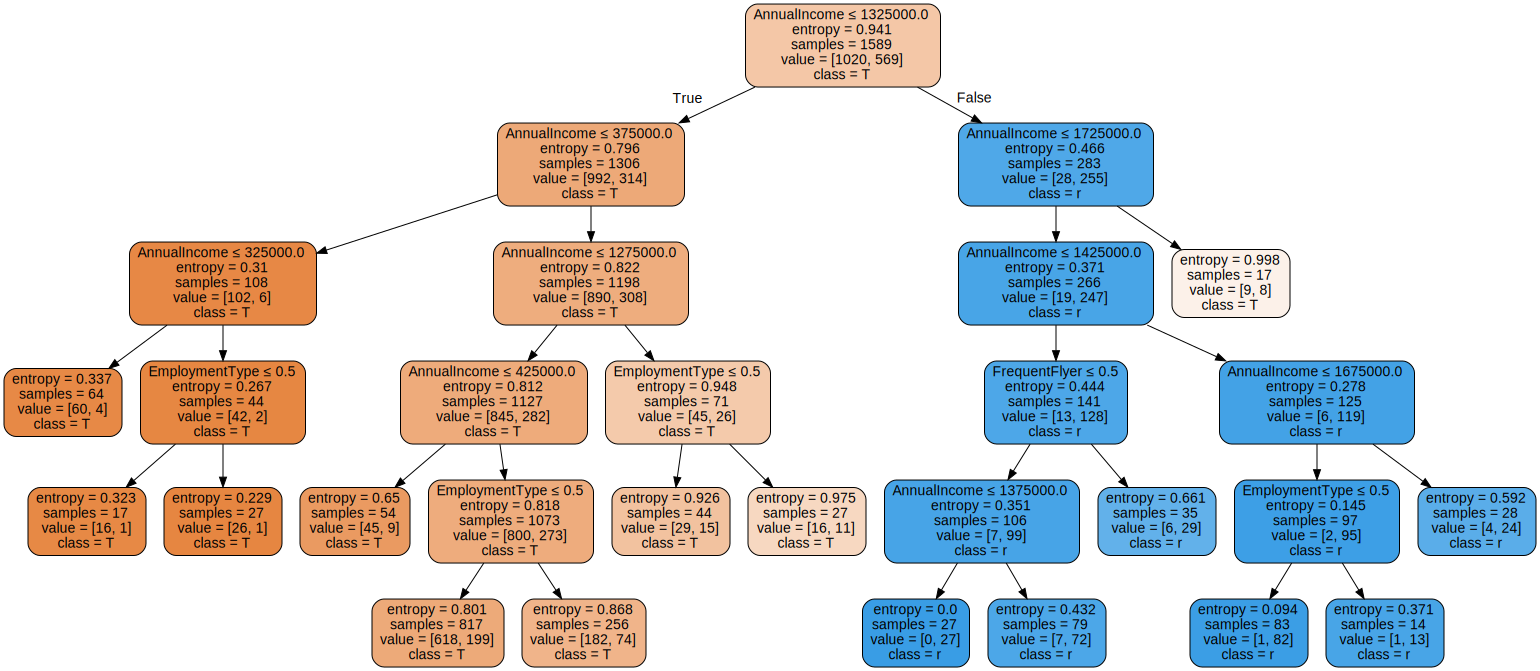

In [ ]:
import graphviz
from sklearn import tree


#model = DecisionTreeClassifier()
#model.fit(X, y)
dot_data = tree.export_graphviz(dtree,
                  feature_names=X_train.columns,
                  class_names='TravelInsurance',
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

## 2. Decision Tree with Gini

In [ ]:
dtree.gini=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0, min_samples_leaf=10, min_samples_split=10)

In [ ]:
dtree.gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)

In [ ]:
y_pred_gini=dtree.gini.predict(X_test)

In [ ]:
Score_gini=accuracy_score(y_test,y_pred_gini)
#print("Accuracy: %0.2f" % (round(Score_gini*100,2)))
print('Accuracy:', Score_gini*100)

Accuracy: 80.15075376884423


In [ ]:
print(metrics.confusion_matrix(y_test,y_pred_gini,labels = [1,0]))
print('-----------------------------------------')
tp, fn, fp, tn = confusion_matrix(y_test,y_pred_gini,labels=[1,0]).ravel()
print('TP:', tp)
print('FN:', fn)
print('FP:', fp)
print('TN:', tn)

[[ 63  78]
 [  1 256]]
-----------------------------------------
TP: 63
FN: 78
FP: 1
TN: 256


In [ ]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       257
           1       0.98      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.88      0.72      0.74       398
weighted avg       0.84      0.80      0.78       398



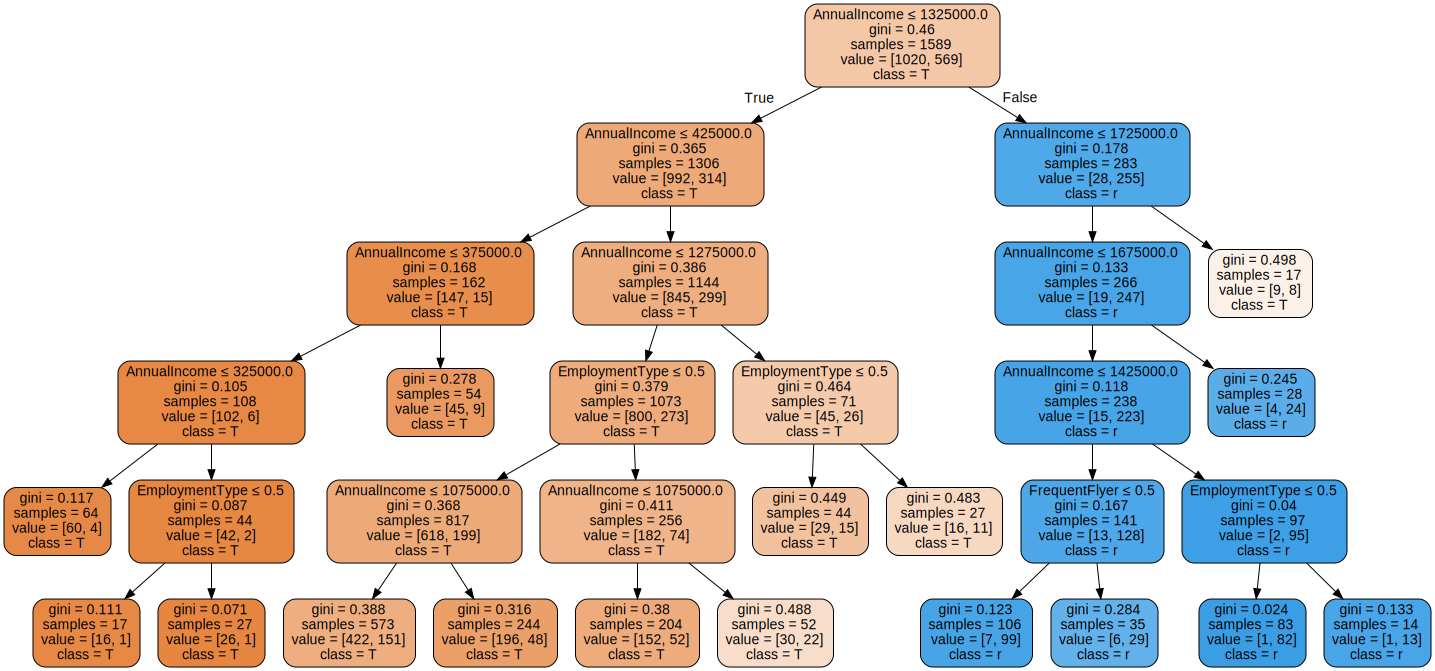

In [ ]:
#@title Default title text
dot_data = tree.export_graphviz(dtree.gini,
                  feature_names=X_train.columns,
                  class_names='TravelInsurance',
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.format = "png"
graph.render("decision_tree_gini", view=True)

'decision_tree_gini.png'

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(20)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
Score_knn=accuracy_score(y_test,y_pred_knn)
#print("Accuracy: %0.2f" % (round(Score_knn*100,2)))
print('Accuracy:', Score_knn*100)

Accuracy: 80.15075376884423


In [ ]:
print(metrics.confusion_matrix(y_test,y_pred_knn,labels = [1,0]))
print('-----------------------------------------')
tp, fn, fp, tn = confusion_matrix(y_test,y_pred_knn,labels=[1,0]).ravel()
print('TP:', tp)
print('FN:', fn)
print('FP:', fp)
print('TN:', tn)

[[ 63  78]
 [  1 256]]
-----------------------------------------
TP: 63
FN: 78
FP: 1
TN: 256


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       257
           1       0.98      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.88      0.72      0.74       398
weighted avg       0.84      0.80      0.78       398



Text(0.5, 1.0, 'Model Comparison - Model Accuracy')

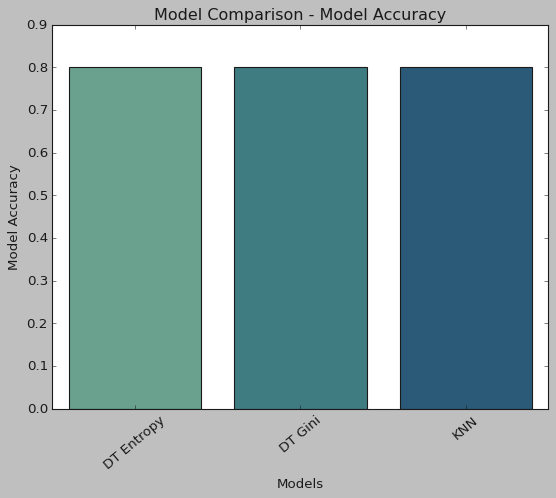

In [ ]:
plt.style.use("classic")
x = ["DT Entropy", "DT Gini", "KNN"]

y = [Score_entropy, Score_gini, Score_knn]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy")

In [ ]:
print('DT Entropy:', round(Score_entropy*100,2))
print('DT Gini:', round(Score_gini*100,2))
print('KNN:', round(Score_knn*100,2))

DT Entropy: 80.15
DT Gini: 80.15
KNN: 80.15
